In [ ]:
import pandas as pd

# Replace 'your_file.xlsx' with your actual file name
df = pd.read_excel("ILFullDataset216.xlsx")

# Display the first few rows of the DataFrame
df.head()


<ipython-input-14-0fb8c1664624>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['physician_proportion'] = df['# Primary Care Physicians (2024)'] / df['Total Pop (2022)']
<ipython-input-14-0fb8c1664624>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['physician_norm'] = min_max_normalize(df['physician_proportion'])
<ipython-input-14-0fb8c1664624>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

                         NAME  physician_norm  healthy_obesity  \
0      Adams County, Illinois        0.631332         0.315789   
1  Alexander County, Illinois        0.075467         0.000000   
2       Bond County, Illinois        0.303409         0.466165   
3      Boone County, Illinois        0.294516         0.248120   
4      Brown County, Illinois        0.054330         0.187970   

   healthy_diabetes  overall_health_indicator  overall_risk_indicator  
0          0.736264                  0.578679                0.421321  
1          0.000000                  0.037734                0.962266  
2          0.637363                  0.427587                0.572413  
3          0.659341                  0.374123                0.625877  
4          0.725275                  0.255476                0.744524  


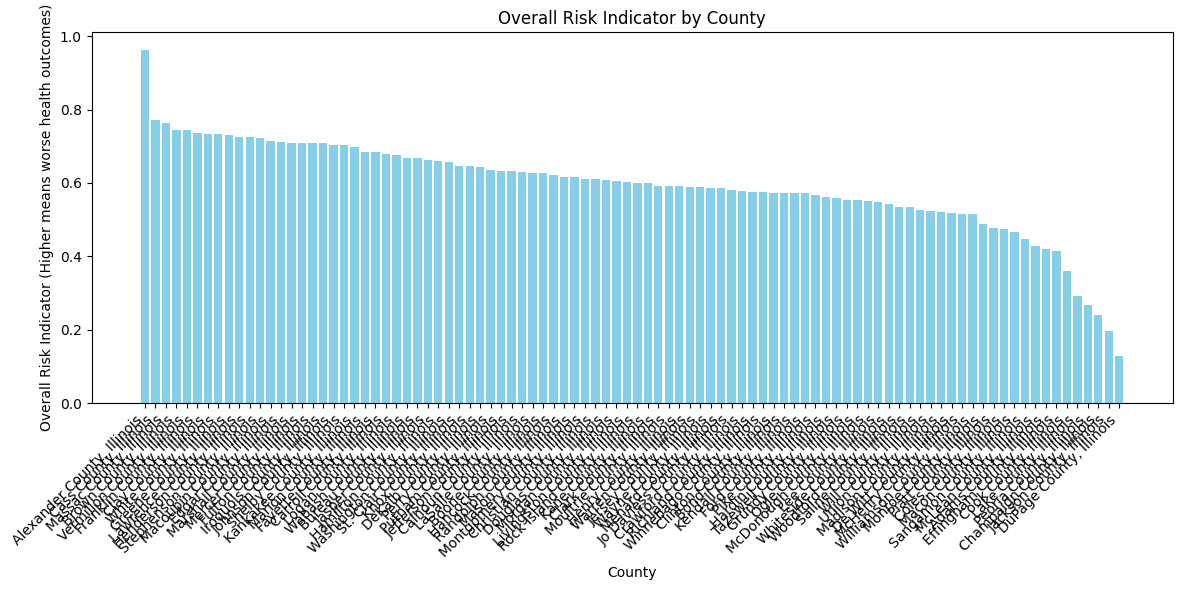

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values for the required columns
df = df.dropna(subset=['# Primary Care Physicians (2024)', 'Total Pop (2022)', 'Obesity', 'Diabetes'])

# 1. Compute the physician-to-population proportion
df['physician_proportion'] = df['# Primary Care Physicians (2024)'] / df['Total Pop (2022)']

# 2. Define a min–max normalization function
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize the physician ratio (higher is better)
df['physician_norm'] = min_max_normalize(df['physician_proportion'])

# 3. Normalize obesity and diabetes percentages (higher values are worse)
df['obesity_norm'] = min_max_normalize(df['Obesity'])
df['diabetes_norm'] = min_max_normalize(df['Diabetes'])

# Invert the normalized obesity and diabetes so that lower (healthier) values become higher scores
df['healthy_obesity'] = 1 - df['obesity_norm']
df['healthy_diabetes'] = 1 - df['diabetes_norm']

# Combine the obesity and diabetes health scores with equal weight (50/50)
df['combined_health'] = (df['healthy_obesity'] + df['healthy_diabetes']) / 2

# 4. Compute the overall health indicator (good health score):
df['overall_health_indicator'] = 0.5 * df['physician_norm'] + 0.5 * df['combined_health']

# Invert the overall health indicator to get a risk indicator (higher means worse health)
df['overall_risk_indicator'] = 1 - df['overall_health_indicator']

# Display the first few rows to verify the computed values
print(df[['NAME', 'physician_norm', 'healthy_obesity', 'healthy_diabetes', 'overall_health_indicator', 'overall_risk_indicator']].head())

# 5. Plotting the results as a bar chart
# Sort by overall risk indicator for better visualization (higher risk at the top)
df_sorted = df.sort_values("overall_risk_indicator", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['NAME'], df_sorted['overall_risk_indicator'], color='skyblue')
plt.xlabel("County")
plt.ylabel("Overall Risk Indicator (Higher means worse health outcomes)")
plt.title("Overall Risk Indicator by County")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

